In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('2008_swing_states.csv')
df[['state', 'county', 'dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


(array([ 1.,  3., 20., 33., 68., 54., 30., 10.,  2.,  1.]), array([ 6.8  , 14.476, 22.152, 29.828, 37.504, 45.18 , 52.856, 60.532,
       68.208, 75.884, 83.56 ]), <a list of 10 Patch objects>)
Text(0.5, 0, 'Percent of vote for Democrates')
Text(0, 0.5, 'number of counties')


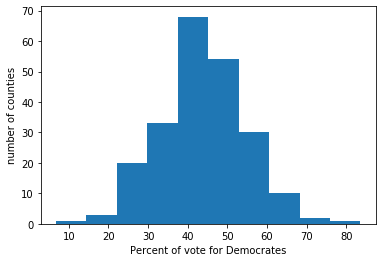

In [19]:
# Each call returns something, but we are not interested in them so we can 
# assign whatever they return to a dummy variable which is commonly called _

# hist will return 3 arrays
_ = plt.hist(df['dem_share'])
print(_)
# Each call returns something 
_ = plt.xlabel('Percent of vote for Democrates')
print(_)
_ = plt.ylabel('number of counties')
print(_)

(array([ 1.,  2., 21., 53., 90., 39., 15.,  0.,  1.,  0.]), array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]), <a list of 10 Patch objects>)


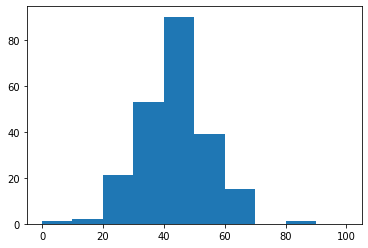

In [25]:
# bins can be assigned
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df['dem_share'], bins = bin_edges)
print(_) # you can see that the used bins is the second value returned 

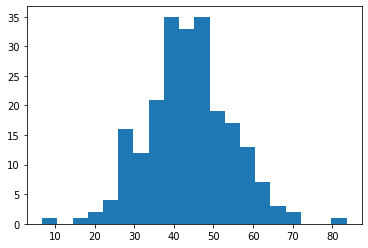

In [26]:
# we can specify the number of bins
_ = plt.hist(df.dem_share, bins=20)

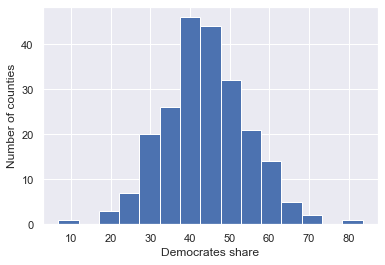

In [28]:
# use seaborn
import seaborn as sns
sns.set() # This uses the settings from seaborn
# Which results in better looking for charts
_ = plt.hist(df.dem_share, bins=15)
_ = plt.xlabel('Democrates share')
_ = plt.ylabel('Number of counties')

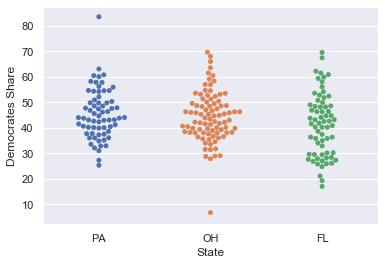

In [32]:
# The shape of a histogram will depend oon the bins 
# Which could lead to Binning Bias
# i.e., understanding the data differently because of the bins
# Another problems with hists is that we are not plotting all of the data
# So we could be missing something

# Bee swarm plots can help in resolving these problems

# The seborn library is used to plot Bee Swarm plts
# Data MUST be in a Pandas dataframe, where each column is a feature and each row is an observation

_ = sns.swarmplot(x = 'state', y = 'dem_share', data = df)
_ = plt.xlabel('State')
_ = plt.ylabel('Democrates Share')

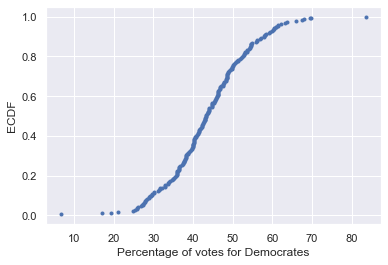

In [50]:
# ECDF: Empirical Cumulative Distribution Function
# The x axis is the quantity we are measuring
# The y axis is the fraction of data points that have a value 
# smaller than or equal the corresponding x value

# To draw an ECDF
# x axis must be sorted
# x is the percentage of votes for democrates
x = np.sort(df.dem_share)

# To understand why we need to sort better
# Remember that the x is the share of votes for dems in counties
# The max x value is the highest share of votes in any county 
# which is around 85% ==> all countiess (100% of them) had a percentage
# that is less than or equal to 85%

# The y is a percentage or fraction ==> MAX = 1
# The + 1 is needed because we are starting from 1 ==> to have len(x) ticks
# The divide by len makes the y a percentage bounded by 1 (or 100%)
y = np.arange(1, len(x) + 1) / len(x)

# Now we can draw
_ = plt.plot(x, y, marker='.', linestyle='none')

# Note that plt.plot by default draws lines or connects the dots
# That is why linestyle is set to none and marker to . (point)

_ = plt.xlabel('Percentage of votes for Democrates')
_ = plt.ylabel('ECDF')

# a point in the plot tells us the percaentage of counties (y-axis)
# that had a percentage of votes that is equal to or less than the (x-axis)
# For example, in the plot at x = 50 the value of y = 0.75 approx
# ==> 75% of the counties had 50% or less votes for Dems




In [53]:
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


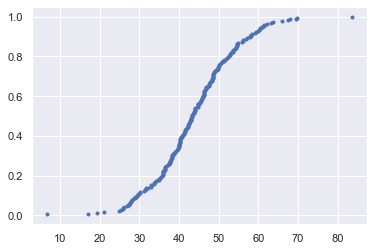

In [64]:
xv = np.sort(df.dem_votes)
#xv = sorted(df.dem_votes)
#print(xv)

yv = (np.arange(1, len(xv))+1)/len(xv)
#print(yv)

_ = plt.plot(x, y, marker = '.', linestyle='none')

In [2]:
import MyLib as my

In [3]:
x, y = my.ecdf(df.dem_share)
_ = plt.plot(x, y, marker = '.', linestyle='none')

AttributeError: module 'MyLib' has no attribute 'ecdf'